In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Load the data
sleep = pd.read_csv('http://lignos.org/pybootcamp/examples/sleep_study.csv')

In [3]:
# Just show the first five items
sleep.head()

,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308


(array([ 10.,  25.,  34.,  36.,  23.,  25.,  15.,   5.,   3.,   4.]),
 array([ 194.3322 ,  221.53433,  248.73646,  275.93859,  303.14072,
         330.34285,  357.54498,  384.74711,  411.94924,  439.15137,
         466.3535 ]),
 <a list of 10 Patch objects>)

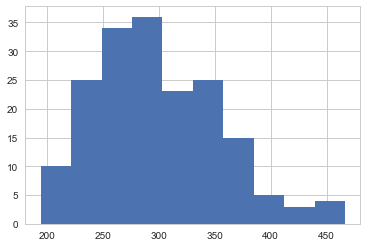

In [4]:
# Simple histogram using matplotlib
plt.hist(sleep.Reaction)

C:\Users\lignos\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


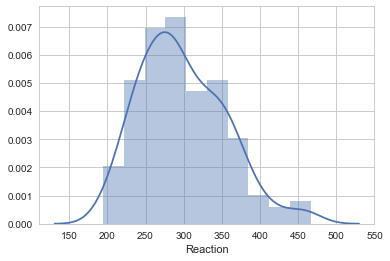

In [5]:
# Seaborn provides a fancier histogram, with kernel density estimation
# This will produce a warning, don't worry about it. You can disable
# the density estimation using kde=False
sns.distplot(sleep.Reaction)

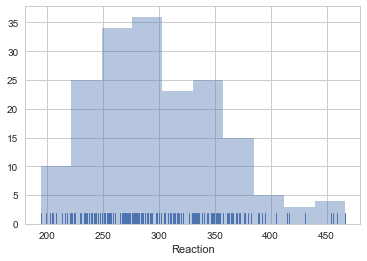

In [6]:
# Again, minus the density estimation, with a rug
sns.distplot(sleep.Reaction, kde=False, rug=True)

In [7]:
# Demonstating the help command
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

C:\Users\lignos\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


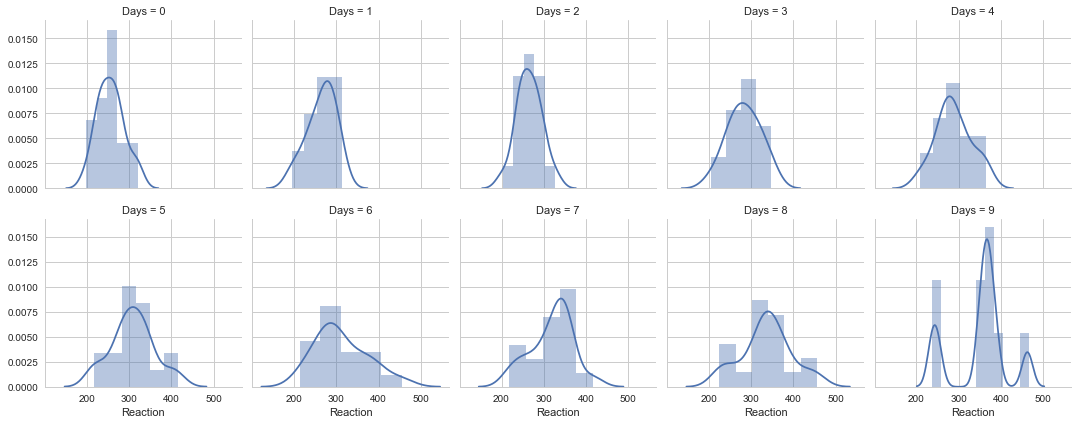

In [8]:
# We can use faceting to build up a grid of plots
grid = sns.FacetGrid(sleep, col="Days", col_wrap=5)
grid.map(sns.distplot, "Reaction")

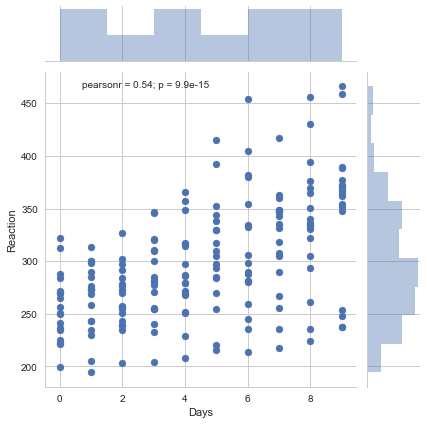

In [9]:
# Use sns.jointplot for scatter plots
sns.jointplot(x="Days", y="Reaction", data=sleep)

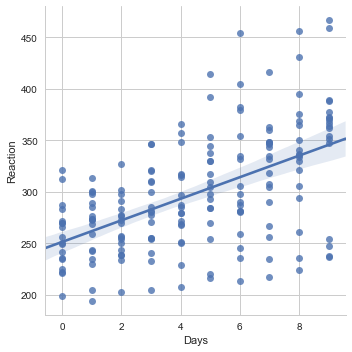

In [10]:
# Simple plot with linear fit
sns.lmplot(x="Days", y="Reaction", data=sleep)

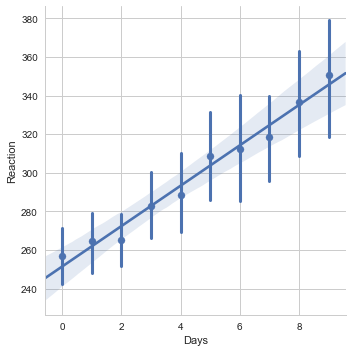

In [11]:
# Plot means only. By default, this also computes a bootstrap distribution of the mean
sns.lmplot(x="Days", y="Reaction", data=sleep, x_estimator=np.mean)

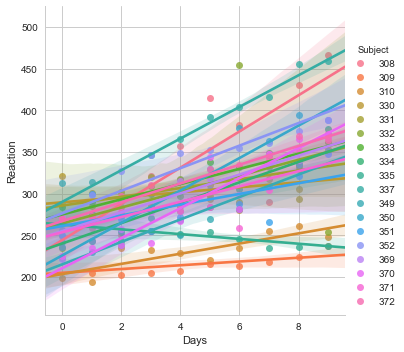

In [12]:
# An unreadable plot of all subjects at once
sns.lmplot(x="Days", y="Reaction", hue="Subject", data=sleep)

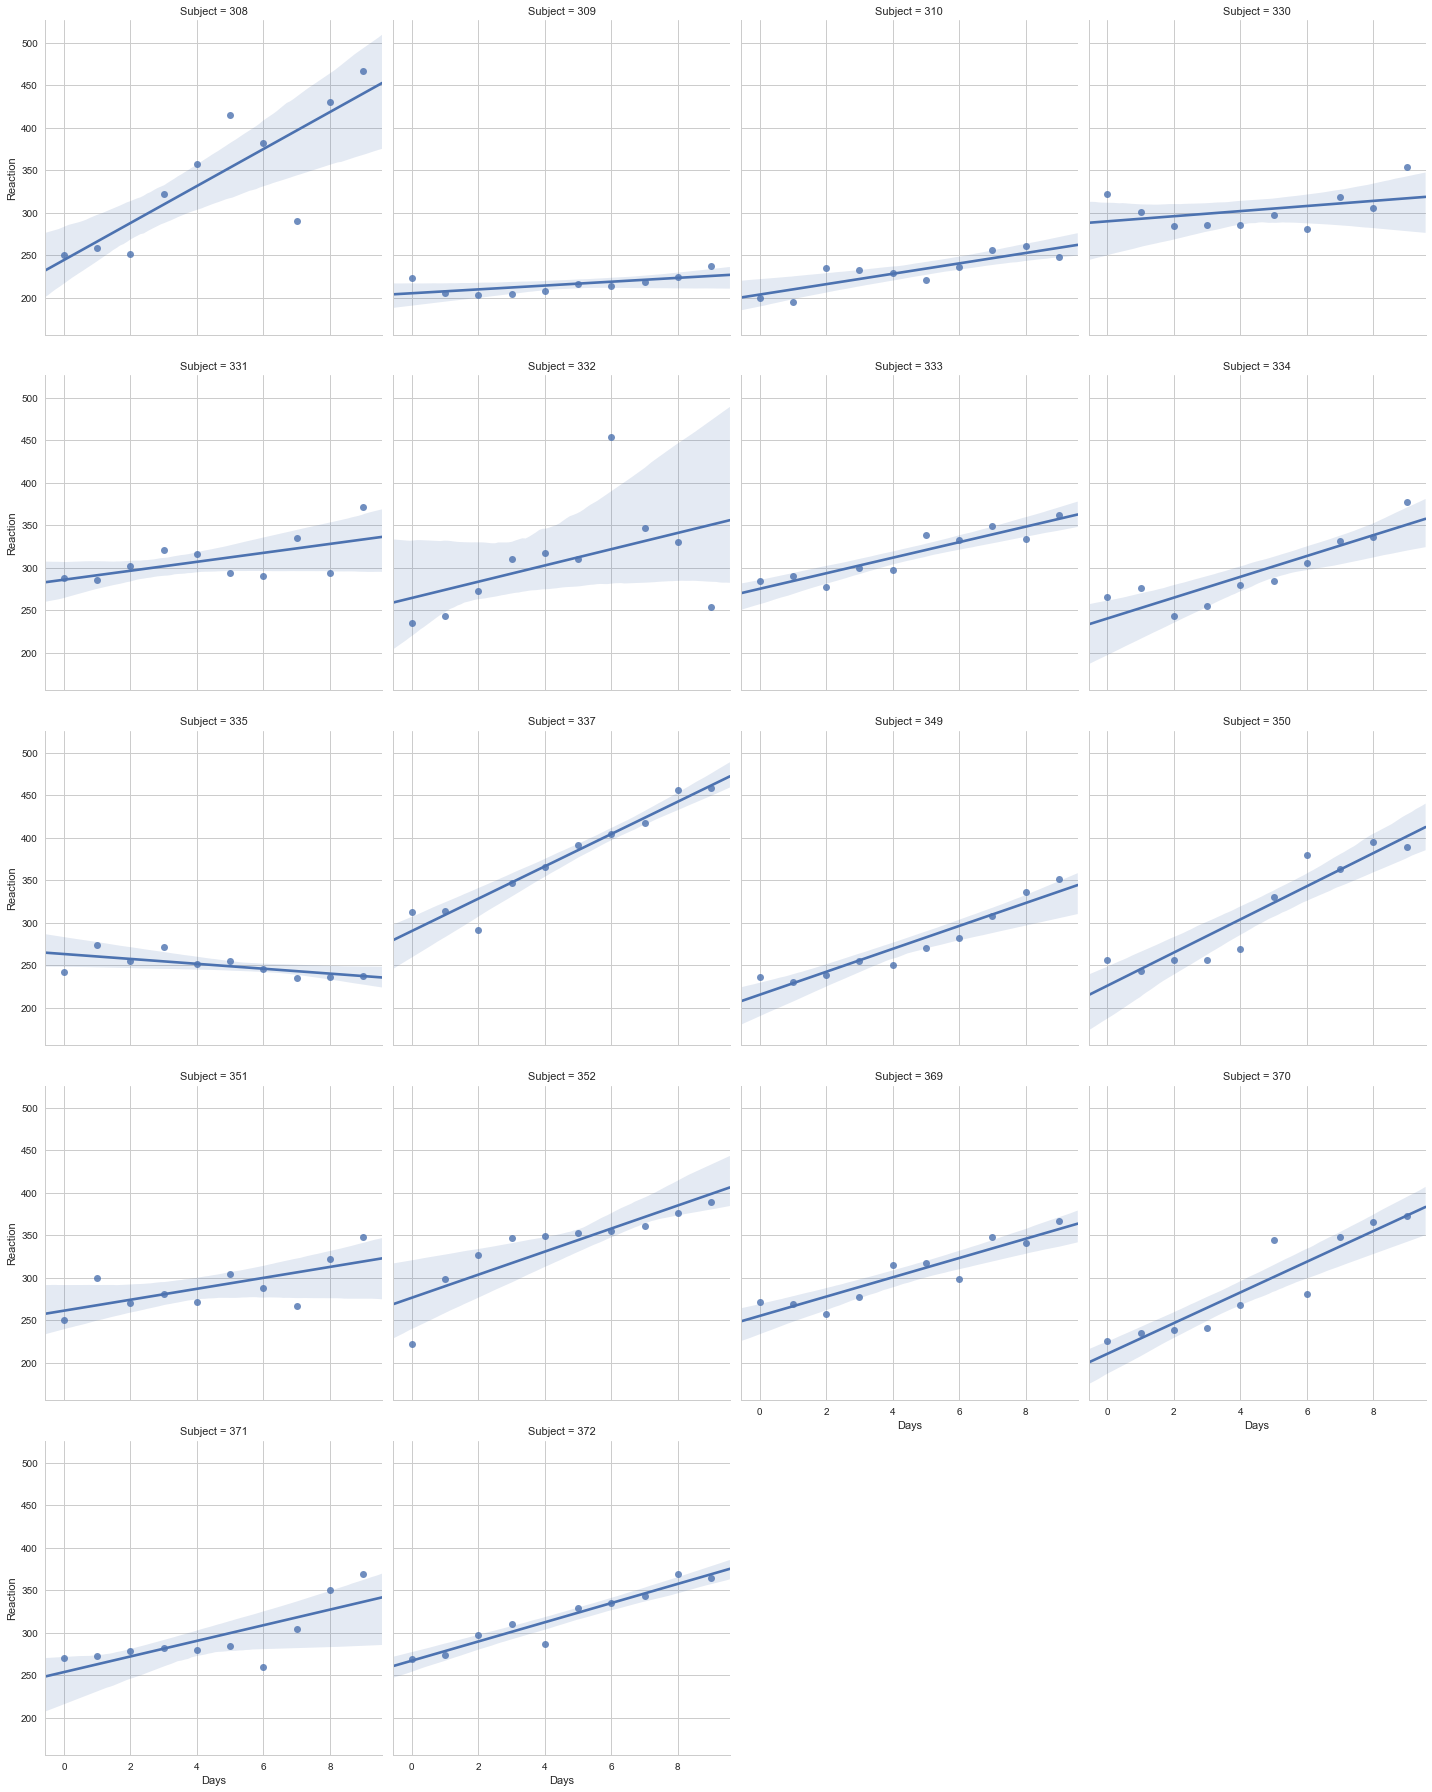

In [13]:
# Use faceting to make this readable
sns.lmplot(x="Days", y="Reaction", data=sleep, col="Subject", col_wrap=4)

In [14]:
# Extracting a single subject's data
subject = sleep[sleep.Subject == 308]
subject.head()

,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308


In [15]:
# Easy descriptive stats on the subset
subject.Reaction.mean()

342.13383000000005